Mouse_Brain_multi_slice

In [1]:
import random
import numpy as np
import scanpy as sc
import torch
import argparse
import yaml
from yaml import SafeLoader
from package.data_processing import LoadBatchAdata
from package.model import STAMGC
import warnings


warnings.filterwarnings('ignore')
import os
os.chdir('/home/lsfcj/lsf/第一个工作3.0')

In [2]:
file_fold='/data/lsfcj/DATA'

args = argparse.Namespace(
    catalogue='Multi_slice',
    dataset='Mouse_Brain',
    parameter='integration_horizontal',
    slice_list=['Mouse_Brain_Anterior','Mouse_Brain_Posterior'],
    batch_size=2,
    path3='',
    platform='10x',
    spot_size=100,
    config='./train_config.yaml',
    label=False,
)
config = yaml.load(open(args.config), Loader=SafeLoader)[str(args.catalogue)][str(args.parameter)]

path = os.path.join(file_fold, args.dataset)

torch.manual_seed(config['seed'])
np.random.seed(config['seed'])
if torch.cuda.is_available():
    torch.cuda.manual_seed(config['seed'])
    torch.cuda.manual_seed_all(config['seed'])
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
random.seed(12345)
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8' 
torch.use_deterministic_algorithms(True)

In [3]:
# adata=LoadBatchAdata(path,args.catalogue,args.dataset,args.slice_list,config,args).run()
# print(adata)

In [3]:
adata=sc.read_h5ad('./results/'+args.catalogue+'/'+args.dataset+'/data_processing.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 6050 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'slice'
    var: 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'smooth_r', 'spatial'
    obsm: 'gene_feat', 'graph_neigh', 'smooth_gene', 'spatial'


=== Generate pseudo labels! ===


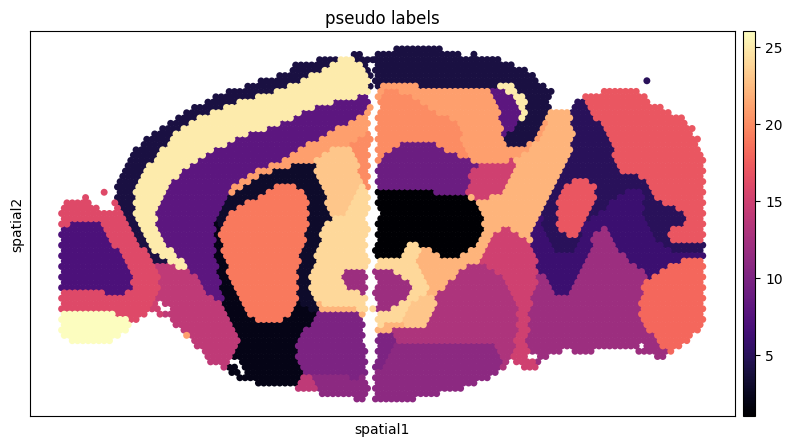

=== train ===
epoch: 0  total_loss: 13.48636245727539  alpha: 7  beta: 0.1  gama: 0.9
epoch: 1  total_loss: 12.67955493927002  alpha: 7  beta: 0.1  gama: 0.9
epoch: 2  total_loss: 12.39798641204834  alpha: 7  beta: 0.1  gama: 0.9
epoch: 3  total_loss: 11.810136795043945  alpha: 7  beta: 0.1  gama: 0.9
epoch: 4  total_loss: 11.270806312561035  alpha: 7  beta: 0.1  gama: 0.9
epoch: 5  total_loss: 10.814393997192383  alpha: 7  beta: 0.1  gama: 0.9
epoch: 6  total_loss: 10.38410758972168  alpha: 7  beta: 0.1  gama: 0.9
epoch: 7  total_loss: 10.022802352905273  alpha: 7  beta: 0.1  gama: 0.9
epoch: 8  total_loss: 9.728696823120117  alpha: 7  beta: 0.1  gama: 0.9
epoch: 9  total_loss: 9.447306632995605  alpha: 7  beta: 0.1  gama: 0.9
epoch: 10  total_loss: 9.22329330444336  alpha: 7  beta: 0.1  gama: 0.9
epoch: 11  total_loss: 9.067668914794922  alpha: 7  beta: 0.1  gama: 0.9
epoch: 12  total_loss: 8.928473472595215  alpha: 7  beta: 0.1  gama: 0.9
epoch: 13  total_loss: 8.821165084838867  al

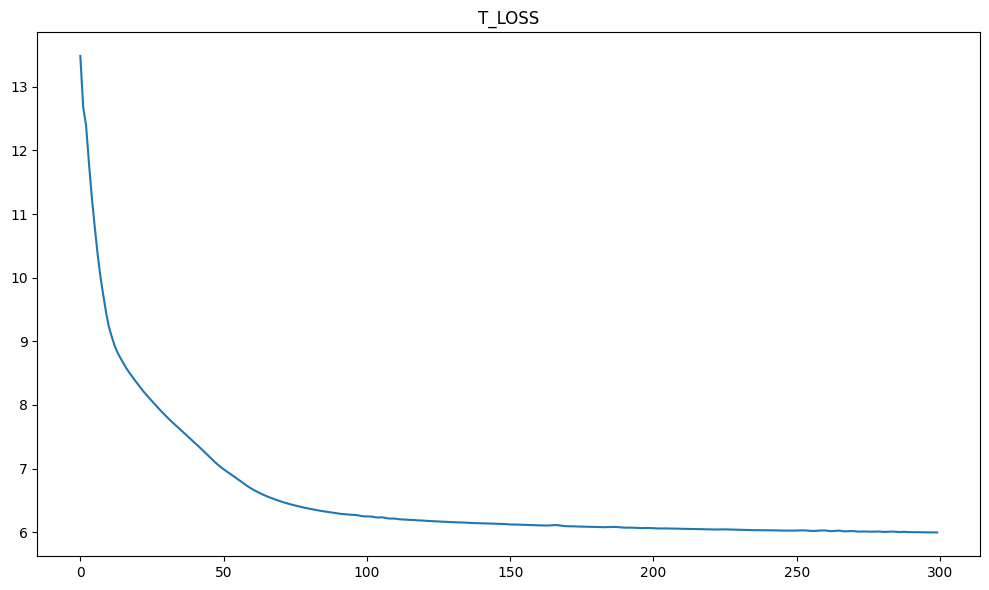

=== load ===
embedding generated, go clustering
calculate SC and DB
SC: 0.34369153
DB: 1.1138463871514268


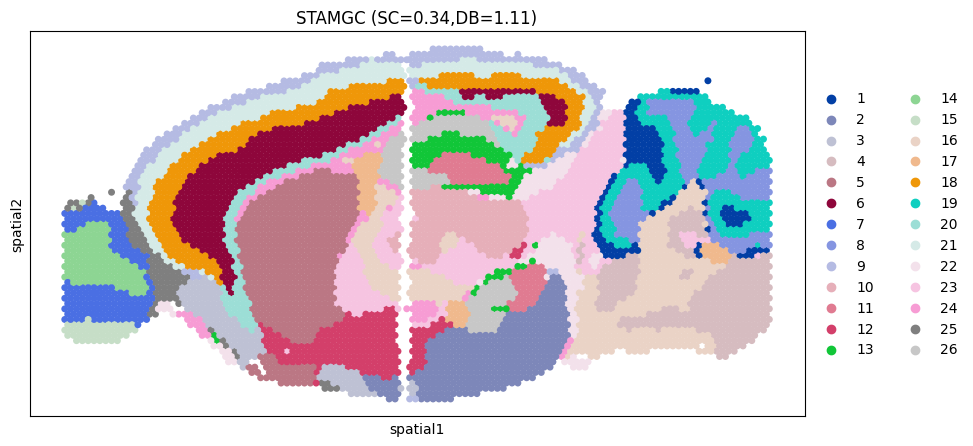

complete!


In [4]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)
adata=STAMGC(adata,config,args,path3=args.path3).run()

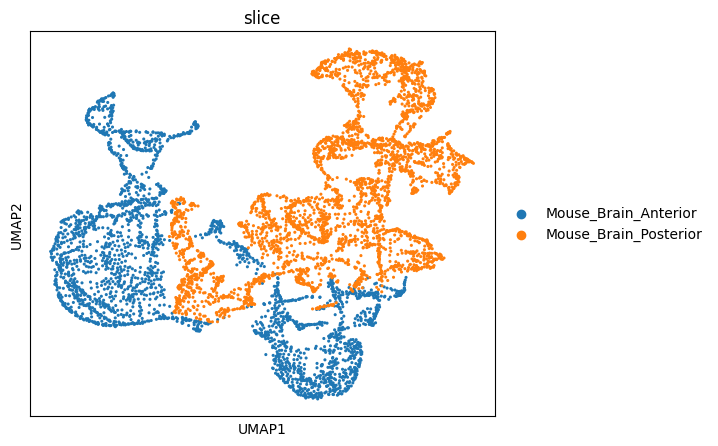

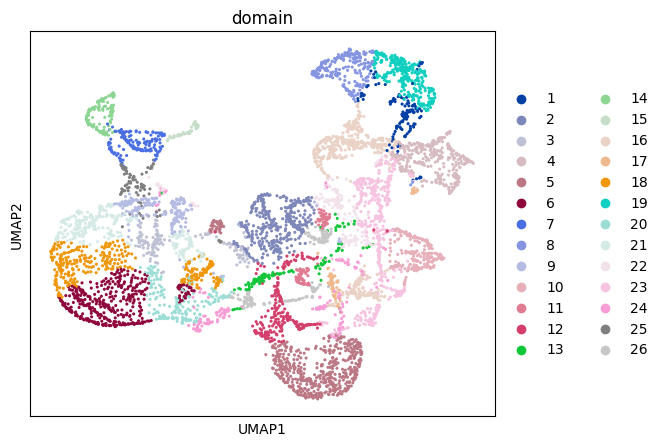

In [6]:
color=['slice','domain']
sc.pp.neighbors(adata, use_rep='z', metric='cosine')
sc.tl.umap(adata)
plt.rcParams['figure.figsize'] = (6, 5)
for i in color:
    sc.pl.umap(adata, color=i, show=False)
    plt.savefig('./results/'+args.catalogue+'/'+args.dataset+'/'+i+'_umap.png')
    plt.show()

In [3]:
adata=sc.read_h5ad('./results/Multi_slice/'+args.dataset+'/STAMGC.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 6050 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'slice', 'pseudo_labels', 'domain'
    var: 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'db', 'domain_colors', 'hvg', 'log1p', 'sc', 'smooth_r', 'spatial'
    obsm: 'emb_pca', 'gene_feat', 'graph_neigh', 'h', 'mlp', 'smooth_gene', 'spatial', 'z'


绘制基因 'Mbp' 的空间表达分布...
图像已保存到: ./results/Multi_slice/Mouse_Brain/genes/Mbp_spatial.png


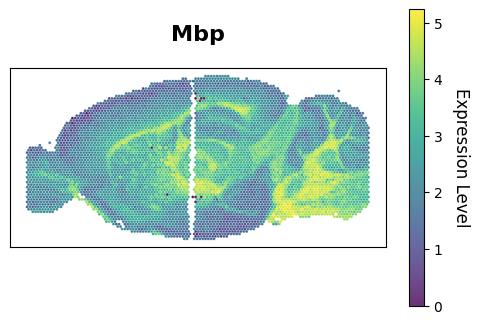

绘制基因 'Nrgn' 的空间表达分布...
图像已保存到: ./results/Multi_slice/Mouse_Brain/genes/Nrgn_spatial.png


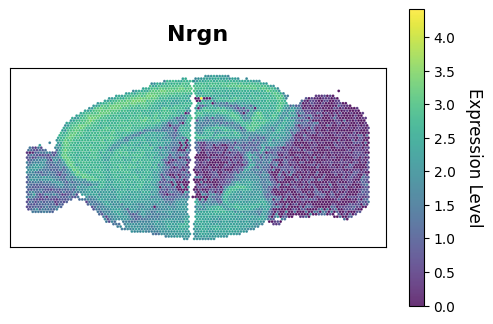

绘制基因 'Pcp4' 的空间表达分布...
图像已保存到: ./results/Multi_slice/Mouse_Brain/genes/Pcp4_spatial.png


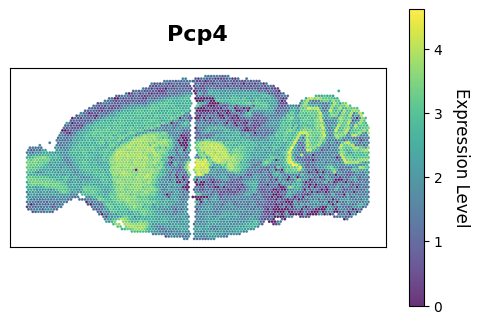

绘制基因 'Gabra1' 的空间表达分布...
图像已保存到: ./results/Multi_slice/Mouse_Brain/genes/Gabra1_spatial.png


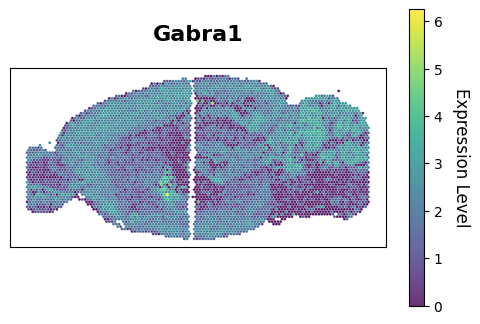

绘制基因 'Slc6a11' 的空间表达分布...
图像已保存到: ./results/Multi_slice/Mouse_Brain/genes/Slc6a11_spatial.png


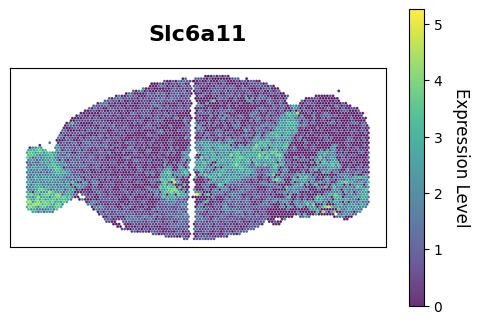

绘制基因 'Cck' 的空间表达分布...
图像已保存到: ./results/Multi_slice/Mouse_Brain/genes/Cck_spatial.png


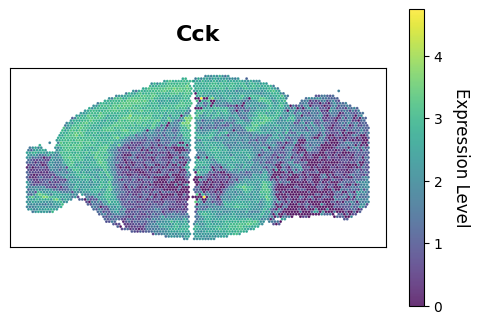

绘制基因 'Apod' 的空间表达分布...
图像已保存到: ./results/Multi_slice/Mouse_Brain/genes/Apod_spatial.png


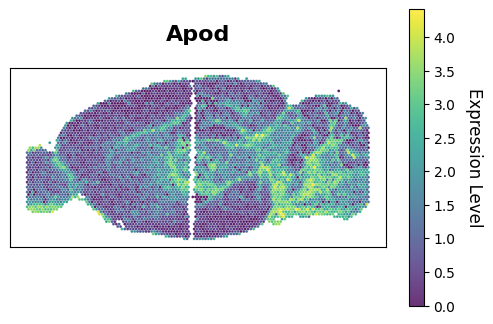

绘制基因 'C1ql2' 的空间表达分布...
图像已保存到: ./results/Multi_slice/Mouse_Brain/genes/C1ql2_spatial.png


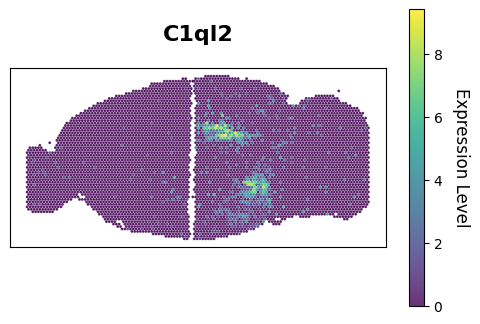

绘制基因 'Hpca' 的空间表达分布...
图像已保存到: ./results/Multi_slice/Mouse_Brain/genes/Hpca_spatial.png


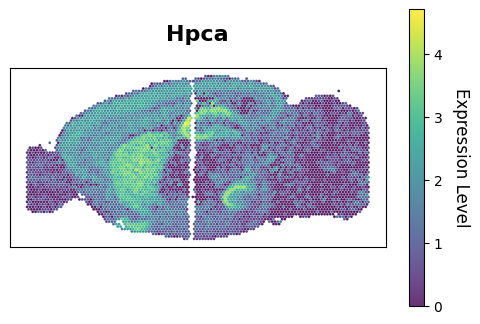

In [4]:
from package.utils import plot_spatial_gene_expression
marker_genes=['Mbp','Nrgn','Pcp4','Gabra1','Slc6a11','Cck','Apod','C1ql2','Hpca']
for i in marker_genes:
    plot_spatial_gene_expression(adata,i,spot_size=1,platform='inter',save_path='./results/Multi_slice/'+args.dataset+f'/genes/{i}_spatial.png')

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# A = coor_adj# 邻接矩阵
A=adata.obsm['graph_neigh_coor']
pos = adata.obsm['spatial']# 每行对应节点的真实坐标

# 2. 建图
G = nx.from_numpy_array(A)             # 无向图；有向加 create_using=nx.DiGraph

# 3. 把坐标转成 NetworkX 要的 dict 格式
pos_dict = {i: pos[i] for i in range(len(pos))}

# 4. 画图
plt.figure(figsize=(12,5))
nx.draw(G, pos_dict,
        with_labels=False,
        node_color='orange',
        edgecolors='black',
        node_size=1,
        font_weight='bold')
plt.axis('equal')                      # 保持 x/y 比例一致
plt.savefig('./results/Multi_slice/'+args.dataset+'/graph_neigh_coor.png')
plt.show()

KeyError: 'graph_neigh_coor'